<a href="https://colab.research.google.com/github/karishmagupta97/cfiar10/blob/master/cfiar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q keras


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense ,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [4]:
# look at kind of data
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
index=5

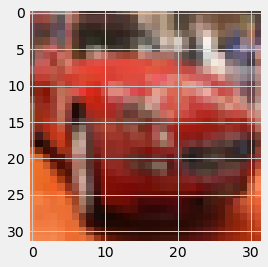

In [6]:
# First image
img=plt.imshow(x_train[index])

In [7]:
# get image label
print('image label is-',y_train[index])

image label is- [1]


In [8]:
# get image classifiaction
classification=['airplane','automobile','bird','cat','deer','dog','frog','ship','truck']
# print image class
print('image class is:',classification[y_train[index][0]])

image class is: automobile


In [9]:

# convert labels into a set of 10 no's to input into neural network
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)

In [10]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [11]:
# here in one hot encoding all will be zero except for one 
print('new label one _hot:', y_train_one_hot[index])

new label one _hot: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
# normalize picture between 0-1
x_train=x_train/255
x_test=x_test/255

In [13]:
x_train[index]

array([[[0.62352941, 0.4       , 0.39607843],
        [0.58823529, 0.35686275, 0.37254902],
        [0.6       , 0.37254902, 0.38039216],
        ...,
        [0.35686275, 0.27843137, 0.21960784],
        [0.29019608, 0.24705882, 0.21568627],
        [0.29803922, 0.22745098, 0.21568627]],

       [[0.55686275, 0.29411765, 0.26666667],
        [0.57254902, 0.28235294, 0.25882353],
        [0.60784314, 0.29803922, 0.25490196],
        ...,
        [0.49803922, 0.41176471, 0.27843137],
        [0.47843137, 0.43529412, 0.36470588],
        [0.3372549 , 0.27058824, 0.23921569]],

       [[0.42745098, 0.2627451 , 0.29411765],
        [0.38823529, 0.22745098, 0.23529412],
        [0.41176471, 0.23137255, 0.20392157],
        ...,
        [0.5372549 , 0.43921569, 0.31372549],
        [0.63921569, 0.51764706, 0.41176471],
        [0.36470588, 0.28235294, 0.27843137]],

       ...,

       [[0.95686275, 0.50588235, 0.2745098 ],
        [0.94117647, 0.48235294, 0.25490196],
        [0.94509804, 0

In [14]:
# create model architecture
model=Sequential()


#Add first layer
model.add( Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))

#Add pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Add another Convulation layer
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))

#Add another pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Add flattening Layer
model.add(Flatten())

# Add a layer with 1000 neurons
model.add(Dense(1000,activation='relu'))

#Add a drop out layer
model.add(Dropout(0.5))

#Add another layer with 500 neurons
model.add(Dense(500,activation='relu'))

#Add a drop out layer
model.add(Dropout(0.5))

#Add another layer with 250 neurons
model.add(Dense(250,activation='relu'))

#Add another layer with 10 neurons
model.add(Dense(10,activation='softmax'))

In [15]:
# compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
# train the model
hist=model.fit(x_train,y_train_one_hot,batch_size=256,epochs=10,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 3s 19ms/step - loss: 1.8217 - accuracy: 0.3121 - val_loss: 1.4821 - val_accuracy: 0.4510
Epoch 2/10
157/157 [==============================] - 3s 16ms/step - loss: 1.4319 - accuracy: 0.4755 - val_loss: 1.3650 - val_accuracy: 0.5132
Epoch 3/10
157/157 [==============================] - 3s 16ms/step - loss: 1.2899 - accuracy: 0.5363 - val_loss: 1.2156 - val_accuracy: 0.5685
Epoch 4/10
157/157 [==============================] - 3s 16ms/step - loss: 1.1920 - accuracy: 0.5745 - val_loss: 1.1366 - val_accuracy: 0.5950
Epoch 5/10
157/157 [==============================] - 3s 16ms/step - loss: 1.0884 - accuracy: 0.6140 - val_loss: 1.0545 - val_accuracy: 0.6322
Epoch 6/10
157/157 [==============================] - 3s 16ms/step - loss: 1.0073 - accuracy: 0.6410 - val_loss: 1.0999 - val_accuracy: 0.6155
Epoch 7/10
157/157 [==============================] - 3s 16ms/step - loss: 0.9519 - accuracy: 0.6626 - val_loss: 1.0160 - val_accuracy: 0.6469

In [17]:
# evaluate the model using test
model.evaluate(x_test,y_test_one_hot)[1]

313/313 [==============================] - 1s 4ms/step - loss: 1.0786 - accuracy: 0.6362


0.6362000107765198

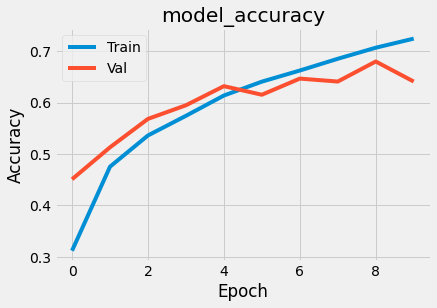

In [18]:
#visualise model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

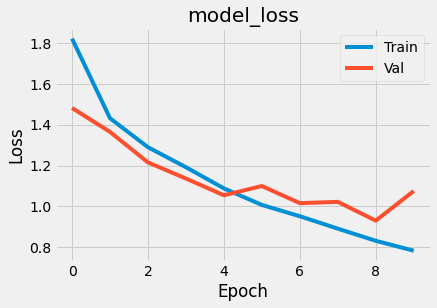

In [19]:
# visualize model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model_loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper right')
plt.show()

In [21]:
# test the model
from google.colab import files
upload=files.upload()

Saving 6.jpg to 6 (1).jpg


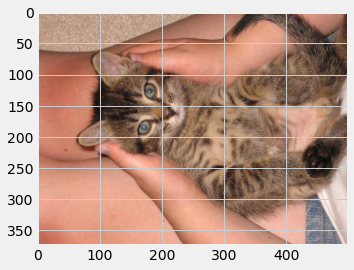

In [22]:
# show the images
new_image=plt.imread('6.jpg')
img=plt.imshow(new_image)

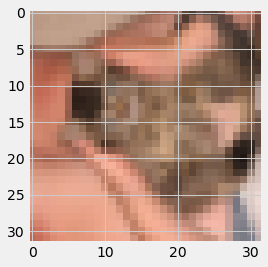

In [23]:
# resize the image
from skimage.transform import resize
resized_image=resize(new_image,(32,32,3))
image=plt.imshow(resized_image)

In [24]:
# get_predictions
predictions=model.predict(np.array([resized_image]))
predictions

array([[2.4475801e-05, 1.9984521e-04, 1.2267856e-03, 4.6505798e-03,
        5.1814213e-04, 2.4622087e-03, 9.9059534e-01, 4.5766647e-05,
        7.8029661e-06, 2.6897888e-04]], dtype=float32)

In [25]:
# highest presiction =8.4 of label=9 i.e =CAT